In [5]:
import random
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt

from PIL import Image
import cv2

import scipy
from scipy import ndimage

from features import rgb2gray

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import imageio

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (30.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def parse_labels(label_arr):
    """    
    None = Normal
    1 = missing data (expected)
    2 = missing data (unexpected)
    3 = miscoloration
    4 = edge warping
    5 = eclipse (missing data)
    6 = eclipse (miscoloration)
    """
    label = 0
    
    # No label!
    if len(label_arr) == 0:
        label = 0
        return label
    
    # Detect the miscoloration labels
    if 3 in label_arr or 6 in label_arr:
        label = 1
    
    return label

### Build up the Histogram of Hue values for Normal Images (Per Pixel)

In [6]:
layer_name = 'VIIRS_SNPP_CorrectedReflectance_TrueColor'
img_extension = ".jpg"
data_dir = 'data/4326/'
labels_file = os.path.join(data_dir, layer_name + ".txt")
img_size = (2048, 1024)

# Check the labels file exists!
assert os.path.exists(labels_file), "Cannot find the {} file".format(layer_name + ".txt")
normal_image_hist = np.zeros((1024, 2048, 360))
print(normal_image_hist.shape)

# Read in the file line by line
with open(labels_file) as f:
    file_lines = f.read().splitlines()
    num_total_img = len(file_lines)
    for line in file_lines:
        line_list = line.split()  
        split = line_list[0]
        datestring = line_list[1]
        label_arr = [int(item) for item in line_list[2:]]
        label = parse_labels(label_arr)
        
        # Skip non-normal images
        if label == 1: 
            continue        
        
        # Print the non-normal image date!
        print(datestring)
        
        # Construct and resize the image
        filename = os.path.join(data_dir, datestring, layer_name + img_extension)
        image_rgb = np.asarray(Image.open(filename).resize(img_size, Image.NEAREST))
        image_hsv = matplotlib.colors.rgb_to_hsv(image_rgb)
        
        # (H, W) = Hue values as indices
        image_hue = 360.0 * image_hsv[:,:,0]
        image_hue = image_hue.astype(int)
        
        # Create height and width indices
        h, w = image_hue.shape
        h_idx, w_idx = np.indices((h, w))
                
        # Height, Width, Hue Indexing!
        normal_image_hist[h_idx, w_idx, image_hue] += 1

(1024, 2048, 360)
2015-11-24
2015-11-25
2015-11-26
2015-11-27
2015-11-28
2015-11-29
2015-11-30
2015-12-01
2015-12-02
2015-12-03
2015-12-04
2015-12-05
2015-12-06
2015-12-07
2015-12-08
2015-12-09
2015-12-10
2015-12-11
2015-12-12
2015-12-13
2015-12-14
2015-12-15
2015-12-16
2015-12-17
2015-12-18
2015-12-19
2015-12-20
2015-12-21
2015-12-22
2015-12-23
2015-12-24
2015-12-25
2015-12-26
2015-12-27
2015-12-28
2015-12-29
2015-12-30
2015-12-31
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
2016-01-12
2016-01-13
2016-01-14
2016-01-15
2016-01-16
2016-01-17
2016-01-18
2016-01-19
2016-01-20
2016-01-21
2016-01-22
2016-01-23
2016-01-24
2016-01-25
2016-01-26
2016-01-27
2016-01-28
2016-01-29
2016-01-30
2016-01-31
2016-02-01
2016-02-02
2016-02-03
2016-02-04
2016-02-05
2016-02-06
2016-02-07
2016-02-08
2016-02-09
2016-02-10
2016-02-11
2016-02-12
2016-02-13
2016-02-14
2016-02-15
2016-02-16
2016-02-17
2016-02-18
2016-02-19
2016-02-20
201

2018-01-30
2018-01-31
2018-02-01
2018-02-02
2018-02-03
2018-02-04
2018-02-05
2018-02-06
2018-02-07
2018-02-08
2018-02-09
2018-02-10
2018-02-11
2018-02-12
2018-02-13
2018-02-14
2018-02-16
2018-02-17
2018-02-18
2018-02-19
2018-02-20
2018-02-21
2018-02-22
2018-02-23
2018-02-24
2018-02-25
2018-02-26
2018-02-27
2018-02-28
2018-03-01
2018-03-02
2018-03-03
2018-03-04
2018-03-05
2018-03-06
2018-03-07
2018-03-08
2018-03-09
2018-03-10
2018-03-11
2018-03-12
2018-03-13
2018-03-14
2018-03-15
2018-03-16
2018-03-17
2018-03-18
2018-03-19
2018-03-20
2018-03-21
2018-03-22
2018-03-23
2018-03-24
2018-03-25
2018-03-26
2018-03-27
2018-03-28
2018-03-29
2018-03-30
2018-03-31
2018-04-01
2018-04-02
2018-04-03
2018-04-04
2018-04-05
2018-04-06
2018-04-07
2018-04-08
2018-04-09
2018-04-10
2018-04-11
2018-04-12
2018-04-13
2018-04-14
2018-04-15
2018-04-16
2018-04-17
2018-04-18
2018-04-19
2018-04-20
2018-04-21
2018-04-22
2018-04-23
2018-04-24
2018-04-25
2018-04-26
2018-04-27
2018-04-28
2018-04-29
2018-04-30
2018-05-01

(1024, 2048, 360)
[230303607       245      7809      1388     33055    147643     14183
     10922     12542    116291    714550     23298   2154086     63454
     48091    297596   1026911    413434    553739    703896    986808
   2781205   2733481   2097688   2315262   5053058  10915835   3007366
   7642122   4408011  11738637   4394277   9582507   5114038   7587390
   2879375   2676067   8360896   2245097   1935066  11328715   3034041
   4264287   3586538   2251415   2667851    116480   1183092   6297179
   4935083     64187   3708653   1939089     48894    516380    563215
    706675   1000067    154623        28  36998790    139433       870
   1166311   1009245    732999    187987   2543454   1346728   1969996
   6735701      3574   8082080    761735    552504    590073   1854764
   1294178     86284   3121590    432249      5990    726458    593459
  10354834   8017176    894764    117121    796022     19346   1870507
   3026381    551732    138899     11986     88138   472860

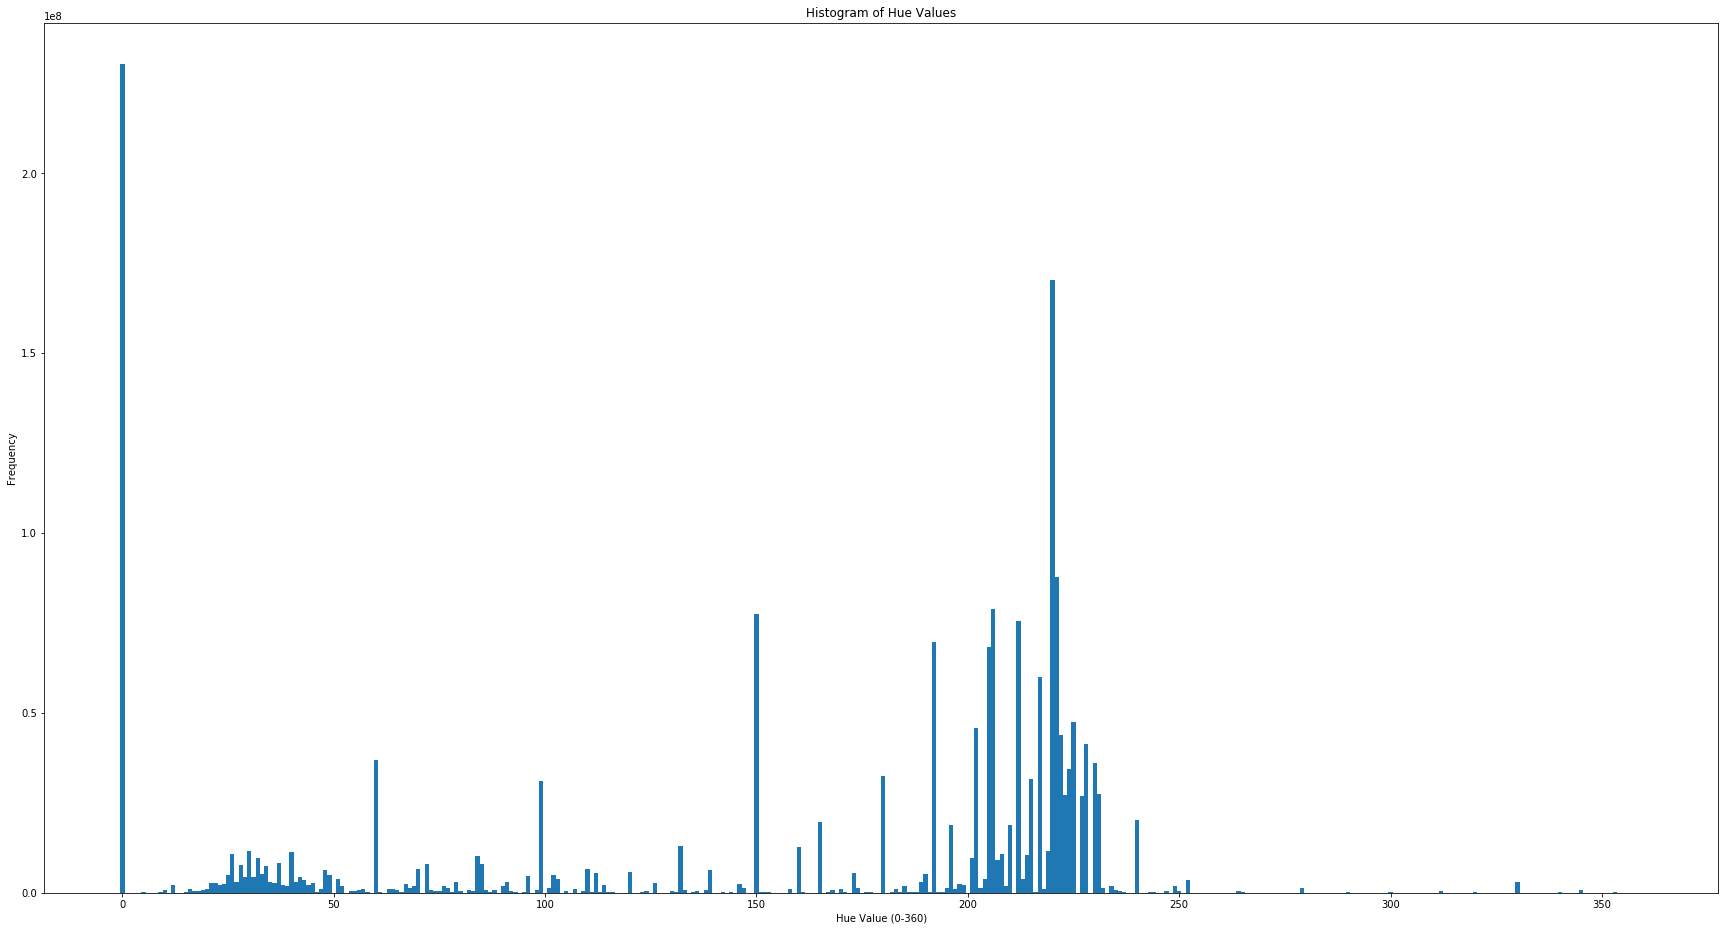

In [7]:
print(normal_image_hist.shape)
pos = np.arange(normal_image_hist.shape[2])
global_hue_hist = np.sum(normal_image_hist, axis=(0,1)).astype(int)
print(global_hue_hist)
plt.bar(pos, global_hue_hist, 1.0)
plt.xlabel('Hue Value (0-360)')
plt.ylabel('Frequency')
plt.title('Histogram of Hue Values')
# plt.grid(True)
plt.show()

In [508]:
datestring = '2016-04-12'
print(datestring)

# Construct and resize the image
filename = os.path.join(data_dir, datestring, layer_name + img_extension)
image_rgb = np.asarray(Image.open(filename).resize(img_size, Image.BILINEAR))
image_hsv = matplotlib.colors.rgb_to_hsv(image_rgb)

2016-04-12


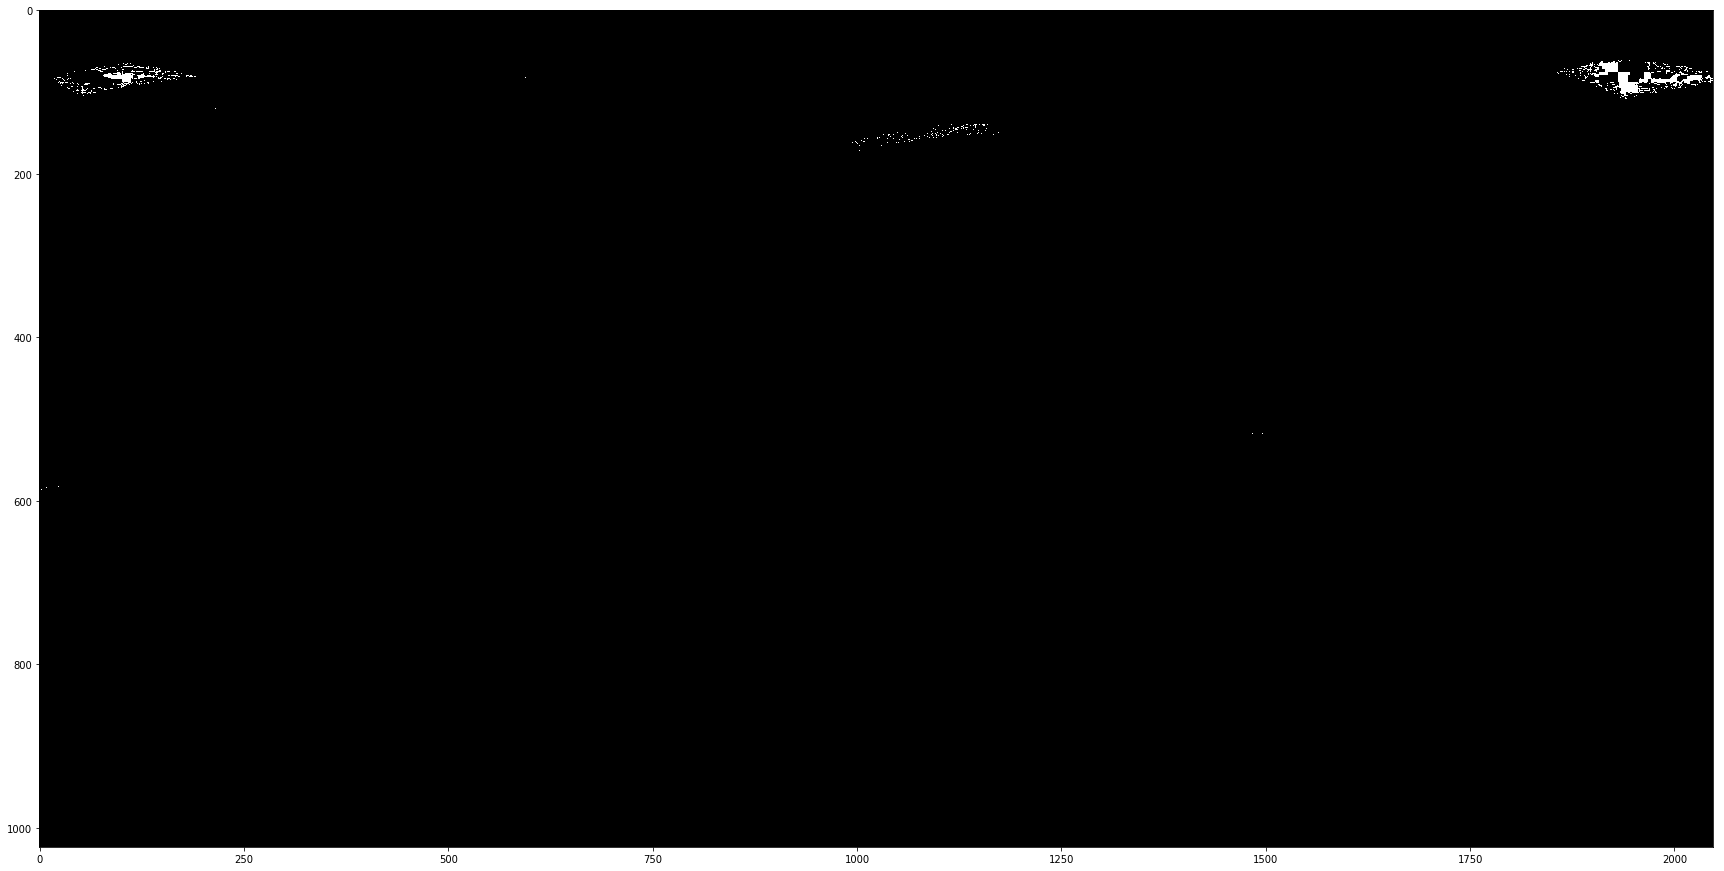

In [509]:
# (H, W) = Hue values as indices
image_hue = 360.0 * image_hsv[:,:,0]
image_value = image_hsv[:,:,2]
image_hue = image_hue.astype(int)

# Create height and width indices
h, w = image_hue.shape
labels_im = np.zeros_like(image_hue)

for h_idx in range(h):
    for w_idx in range(w):
        test_value = int(image_value[h_idx, w_idx])
        test_hue = int(image_hue[h_idx, w_idx])
        hue_histogram = normal_image_hist[h_idx, w_idx, :].astype(int)

        # skip black pixels in text image
        if test_value == 0:
            continue

#         # Reconstruct original data values
#         hue_values = []
#         for hue, count in enumerate(hue_histogram):
#             if count != 0 :
#                 hue_values = hue_values + [hue] * count
#         hue_values = np.array(hue_values)
        
#         # Compute basic statistcs on hue histogram
#         mean = np.mean(hue_values, axis=0)
#         std_dev = np.std(hue_values, axis=0)

#         # Clustered Data (Low STD) and outside the std
#         if std_dev < 40 and abs(mean - test_hue) > 2.0 * std_dev:
#             # Non-existent value

        if global_hue_hist[test_hue] == 0: # no occurences!
            labels_im[h_idx, w_idx] = 1

plt.imshow(labels_im)

In [10]:
# Grayscaled image features!
def get_img_feature_vector(img):
    # Create the feature vector for the images
    indices = np.dstack(np.indices(img.shape[:2]))
    xycolors = np.concatenate((np.expand_dims(img, axis=2), indices), axis=-1) 
    features = np.reshape(xycolors, [-1,3])    
    return features
    # features_normalized = features / features.max(axis = 0)
    # return features_normalized

# DBSCAN        
# Featurize the image for DBscan
X = get_img_feature_vector(labels_im)
X_white = X[X[:,0] == 1]
X_white = X_white[:,1:]
X = X_white

Estimated number of clusters: 99


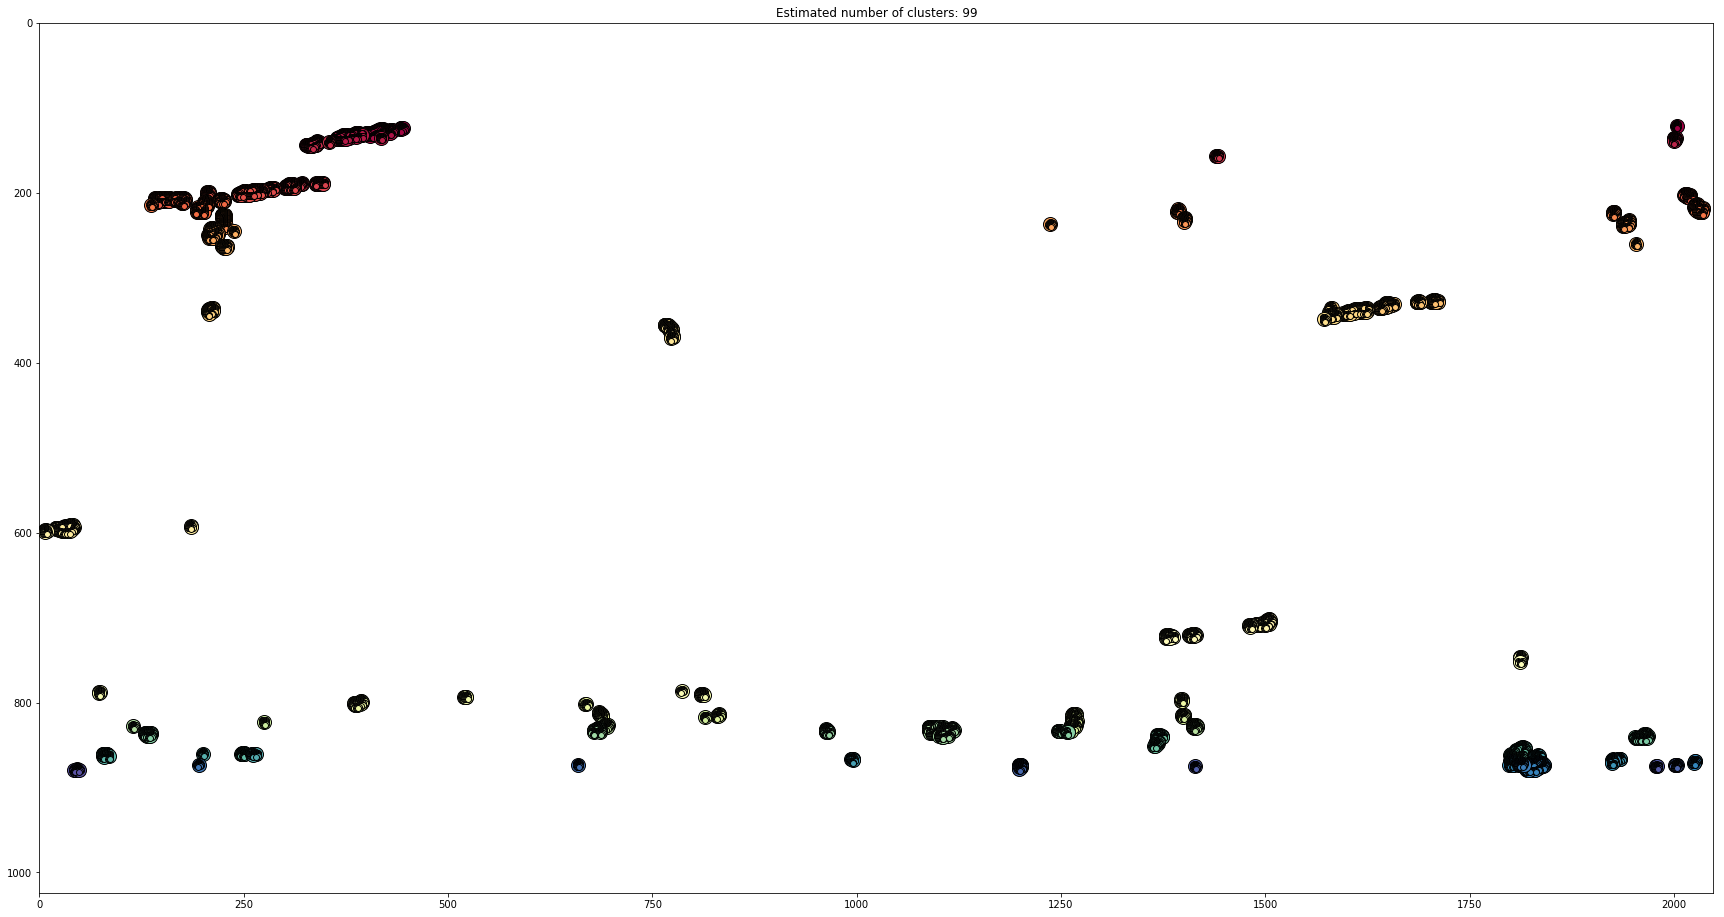

In [499]:
# Run DBscan clustering algorithm!
db = DBSCAN(eps=3.5, min_samples=30).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

# Create an image mask fore labels
filtered_labels_im = np.zeros_like(labels_im)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    # Hide the outliers!
    if col == [0, 0, 0, 1]:
         continue

    class_member_mask = (labels == k)

    # Retrieve the xy (hw) points
    class_xy = X[class_member_mask] # x = h, y = w

    # Label the target pixels as white (= 1)!
    filtered_labels_im[class_xy[:,0], class_xy[:,1]] = 1

    # Plot the clusters!
    core_xy = X[class_member_mask & core_samples_mask]
    plt.plot(core_xy[:, 1], core_xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    noncore_xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(noncore_xy[:, 1], noncore_xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

# Plot result
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlim(0, img_size[0])  # decreasing x
plt.ylim(img_size[1], 0)  # decreasing y
plt.show()

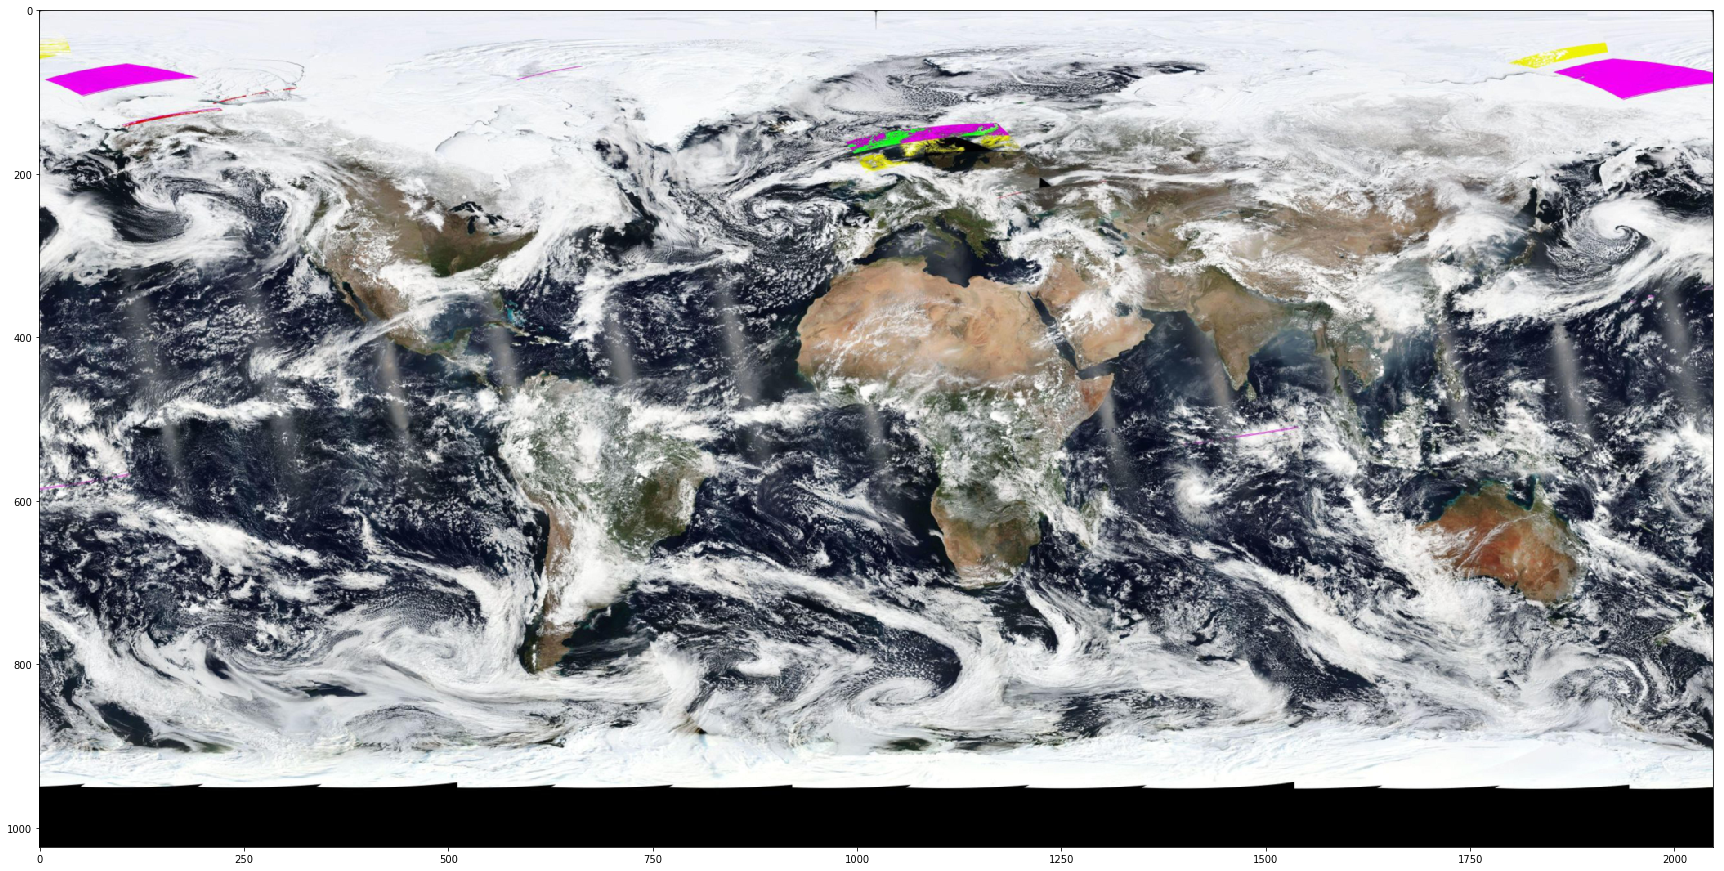

In [512]:
plt.imshow(image_rgb)

In [502]:
labels_filename = os.path.join(data_dir, datestring, 'VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain' + '.png')
print("Writing labels to:", labels_filename)
imageio.imwrite(labels_filename, 255 * filtered_labels_im)

Writing labels to: data/4326/2016-05-22/VIIRS_SNPP_CorrectedReflectance_Miscoloration.png


In [11]:
# Read in the file line by line
with open(labels_file) as f:
    file_lines = f.read().splitlines()
    num_total_img = len(file_lines)
    for line in file_lines:
        line_list = line.split()  
        split = line_list[0]
        datestring = line_list[1]
        label_arr = [int(item) for item in line_list[2:]]
        label = parse_labels(label_arr)
        
        # Skip normal images
        if label == 0: 
            continue        
        
        # Print the non-normal image date!
        print(datestring)
        
        # Construct and resize the image
        filename = os.path.join(data_dir, datestring, layer_name + img_extension)
        image_rgb = np.asarray(Image.open(filename).resize(img_size, Image.NEAREST))
        image_hsv = matplotlib.colors.rgb_to_hsv(image_rgb)
        
        # (H, W) = Hue values as indices
        image_hue = 360.0 * image_hsv[:,:,0]
        image_value = image_hsv[:,:,2]
        image_hue = image_hue.astype(int)

        # Create height and width indices
        h, w = image_hue.shape
        labels_im = np.zeros_like(image_hue, dtype=int)

        for h_idx in range(h):
            for w_idx in range(w):
                test_value = int(image_value[h_idx, w_idx])
                test_hue = int(image_hue[h_idx, w_idx])
                hue_histogram = normal_image_hist[h_idx, w_idx, :].astype(int)

                # Skip black pixels in text image
                if test_value == 0:
                    continue
                
                # Hue value has NEVER appeared!
                if global_hue_hist[test_hue] < 10000: # low occurences!
                    labels_im[h_idx, w_idx] = 1
            
        # Featurize the image for DBscan
        X = get_img_feature_vector(labels_im)
        X_white = X[X[:,0] == 1]
        X_white = X_white[:,1:]
        X = X_white
        
        # Run DBscan clustering algorithm!
        db = DBSCAN(eps=15, min_samples=20).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        print('Estimated number of clusters: %d' % n_clusters_)

        # Create an image mask fore labels
        filtered_labels_im = np.zeros_like(labels_im)

        # Black removed and is used for noise instead.
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            # Hide the outliers!
            if col == [0, 0, 0, 1]:
                 continue

            class_member_mask = (labels == k)

            # Retrieve the xy (hw) points
            class_xy = X[class_member_mask] # x = h, y = w

            # Label the target pixels as white (= 1)!
            filtered_labels_im[class_xy[:,0], class_xy[:,1]] = 1

#             # Plot the clusters!
#             core_xy = X[class_member_mask & core_samples_mask]
#             plt.plot(core_xy[:, 1], core_xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

#             noncore_xy = X[class_member_mask & ~core_samples_mask]
#             plt.plot(noncore_xy[:, 1], noncore_xy[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

#         # Plot result
#         plt.title('Estimated number of clusters: %d' % n_clusters_)
#         plt.xlim(0, img_size[0])  # decreasing x
#         plt.ylim(img_size[1], 0)  # decreasing y
#         plt.show()        
        
        labels_filename = os.path.join(data_dir, datestring, 'VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain' + '.png')
        print("Writing labels to:", labels_filename)
        imageio.imwrite(labels_filename, 255 * filtered_labels_im)

2016-03-31


Estimated number of clusters: 3
Writing labels to: data/4326/2016-03-31/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-01


Estimated number of clusters: 4
Writing labels to: data/4326/2016-04-01/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-02


Estimated number of clusters: 3
Writing labels to: data/4326/2016-04-02/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-03


Estimated number of clusters: 5
Writing labels to: data/4326/2016-04-03/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-04


Estimated number of clusters: 8
Writing labels to: data/4326/2016-04-04/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-05


Estimated number of clusters: 6
Writing labels to: data/4326/2016-04-05/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-06


Estimated number of clusters: 3
Writing labels to: data/4326/2016-04-06/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-07


Estimated number of clusters: 8
Writing labels to: data/4326/2016-04-07/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-08


Estimated number of clusters: 8
Writing labels to: data/4326/2016-04-08/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-09


Estimated number of clusters: 11
Writing labels to: data/4326/2016-04-09/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-10


Estimated number of clusters: 7
Writing labels to: data/4326/2016-04-10/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-11


Estimated number of clusters: 12
Writing labels to: data/4326/2016-04-11/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-12


Estimated number of clusters: 12
Writing labels to: data/4326/2016-04-12/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-13


Estimated number of clusters: 8
Writing labels to: data/4326/2016-04-13/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-14


Estimated number of clusters: 9
Writing labels to: data/4326/2016-04-14/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-15


Estimated number of clusters: 7
Writing labels to: data/4326/2016-04-15/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-16


Estimated number of clusters: 15
Writing labels to: data/4326/2016-04-16/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-17


Estimated number of clusters: 13
Writing labels to: data/4326/2016-04-17/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-18


Estimated number of clusters: 7
Writing labels to: data/4326/2016-04-18/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-19


Estimated number of clusters: 11
Writing labels to: data/4326/2016-04-19/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-20


Estimated number of clusters: 8
Writing labels to: data/4326/2016-04-20/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-21


Estimated number of clusters: 8
Writing labels to: data/4326/2016-04-21/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-22


Estimated number of clusters: 5
Writing labels to: data/4326/2016-04-22/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-23


Estimated number of clusters: 4
Writing labels to: data/4326/2016-04-23/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-24


Estimated number of clusters: 6
Writing labels to: data/4326/2016-04-24/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-25


Estimated number of clusters: 7
Writing labels to: data/4326/2016-04-25/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-26


Estimated number of clusters: 4
Writing labels to: data/4326/2016-04-26/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-27


Estimated number of clusters: 6
Writing labels to: data/4326/2016-04-27/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-28


Estimated number of clusters: 12
Writing labels to: data/4326/2016-04-28/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-29


Estimated number of clusters: 8
Writing labels to: data/4326/2016-04-29/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-04-30


Estimated number of clusters: 8
Writing labels to: data/4326/2016-04-30/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-01


Estimated number of clusters: 5
Writing labels to: data/4326/2016-05-01/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-02


Estimated number of clusters: 8
Writing labels to: data/4326/2016-05-02/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-03


Estimated number of clusters: 8
Writing labels to: data/4326/2016-05-03/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-04


Estimated number of clusters: 9
Writing labels to: data/4326/2016-05-04/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-05


Estimated number of clusters: 6
Writing labels to: data/4326/2016-05-05/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-06


Estimated number of clusters: 3
Writing labels to: data/4326/2016-05-06/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-07


Estimated number of clusters: 9
Writing labels to: data/4326/2016-05-07/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-08


Estimated number of clusters: 11
Writing labels to: data/4326/2016-05-08/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-09


Estimated number of clusters: 8
Writing labels to: data/4326/2016-05-09/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-10


Estimated number of clusters: 5
Writing labels to: data/4326/2016-05-10/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-11


Estimated number of clusters: 7
Writing labels to: data/4326/2016-05-11/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-12


Estimated number of clusters: 7
Writing labels to: data/4326/2016-05-12/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-13


Estimated number of clusters: 9
Writing labels to: data/4326/2016-05-13/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-14


Estimated number of clusters: 10
Writing labels to: data/4326/2016-05-14/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-15


Estimated number of clusters: 14
Writing labels to: data/4326/2016-05-15/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-16


Estimated number of clusters: 8
Writing labels to: data/4326/2016-05-16/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-17


Estimated number of clusters: 7
Writing labels to: data/4326/2016-05-17/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-18


Estimated number of clusters: 9
Writing labels to: data/4326/2016-05-18/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-19


Estimated number of clusters: 2
Writing labels to: data/4326/2016-05-19/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-20


Estimated number of clusters: 9
Writing labels to: data/4326/2016-05-20/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-21


Estimated number of clusters: 4
Writing labels to: data/4326/2016-05-21/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2016-05-22


Estimated number of clusters: 7
Writing labels to: data/4326/2016-05-22/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2017-04-10


Estimated number of clusters: 2
Writing labels to: data/4326/2017-04-10/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
2018-02-15


Estimated number of clusters: 2
Writing labels to: data/4326/2018-02-15/VIIRS_SNPP_CorrectedReflectance_Miscoloration_Certain.png
